In [2]:
from sympy import *
init_printing()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./dmi_weather_data_daily.csv'

# Adjust these column names as needed.
date_col = 'time'
target_col = 'KarupBro'
# List of meteorological features from DMI – update if needed.
input_cols = [
    'temp_min_daily', 'temp_max_daily', 'temp_mean_daily', 
    'temp_grass_mean_daily', 'temp_soil_min_daily', 'temp_soil_max_daily', 
    'temp_soil_mean_daily', 'humidity_daily', 'wind_direction_daily', 
    'wind_speed_daily', 'wind_gust_max_daily', 'precip_total_daily', 
    'precip_duration_daily', 'radiation_global_daily', 
    'sunshine_duration_daily'
]


# Read the CSV
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.reset_index(drop=True, inplace=True)

# Optional: Set the date column as index (if needed)
df.set_index(date_col, inplace=True)

df.tail()

,temp_min_past1h,temp_max_past1h,temp_mean_past1h,temp_grass_mean_past1h,temp_soil_min_past1h,temp_soil_max_past1h,temp_soil_mean_past1h,humidity_past1h,pressure,wind_dir_past1h,wind_min_past1h,wind_gust_always_past1h,wind_speed_past1h,precip_past1h,precip_dur_past1h,radia_glob_past1h,sun_last1h_glob
time,,,,,,,,,,,,,,,,,
2023-12-20 00:00:00+00:00,0.8,4.4,3.141667,2.316667,5.1,5.4,5.241667,88.583333,995.043373,252.000000,NaN,12.2,2.541667,0.4,4.0,349.0,111.0
2023-12-21 00:00:00+00:00,1.4,8.7,5.316667,4.637500,5.0,5.3,5.141667,86.083333,975.337324,254.666667,0.7,22.5,5.329167,19.9,159.0,270.0,29.5
2023-12-22 00:00:00+00:00,0.1,4.0,2.395833,1.129167,4.0,5.1,4.533333,66.000000,983.997222,293.416667,0.0,19.1,5.020833,0.6,3.0,749.0,294.5
2023-12-23 00:00:00+00:00,-1.6,3.3,0.833333,-0.250000,3.6,4.1,3.754167,88.000000,993.885417,264.000000,NaN,10.5,2.379167,0.8,4.0,589.0,247.0
2023-12-24 00:00:00+00:00,-0.3,2.1,1.120000,0.700000,3.4,3.6,3.520000,97.700000,992.207273,136.500000,NaN,6.6,1.500000,5.0,38.0,9.0,0.0


In [7]:
# list of columns
columns = df.columns.tolist()
columns

['temp_min_past1h',
 'temp_max_past1h',
 'temp_mean_past1h',
 'temp_grass_mean_past1h',
 'temp_soil_min_past1h',
 'temp_soil_max_past1h',
 'temp_soil_mean_past1h',
 'humidity_past1h',
 'pressure',
 'wind_dir_past1h',
 'wind_min_past1h',
 'wind_gust_always_past1h',
 'wind_speed_past1h',
 'precip_past1h',
 'precip_dur_past1h',
 'radia_glob_past1h',
 'sun_last1h_glob']


Missing‐values per column:
                          missing_count  missing_pct
temp_min_past1h                    150     1.868460
temp_max_past1h                    150     1.868460
temp_mean_past1h                   150     1.868460
temp_grass_mean_past1h             138     1.718984
temp_soil_min_past1h               138     1.718984
temp_soil_max_past1h               138     1.718984
temp_soil_mean_past1h              138     1.718984
humidity_past1h                    160     1.993024
pressure                          5931    73.878924
wind_dir_past1h                    143     1.781266
wind_min_past1h                   6245    77.790234
wind_gust_always_past1h            758     9.441953
wind_speed_past1h                  143     1.781266
precip_past1h                        0     0.000000
precip_dur_past1h                    0     0.000000
radia_glob_past1h                    0     0.000000
sun_last1h_glob                      0     0.000000


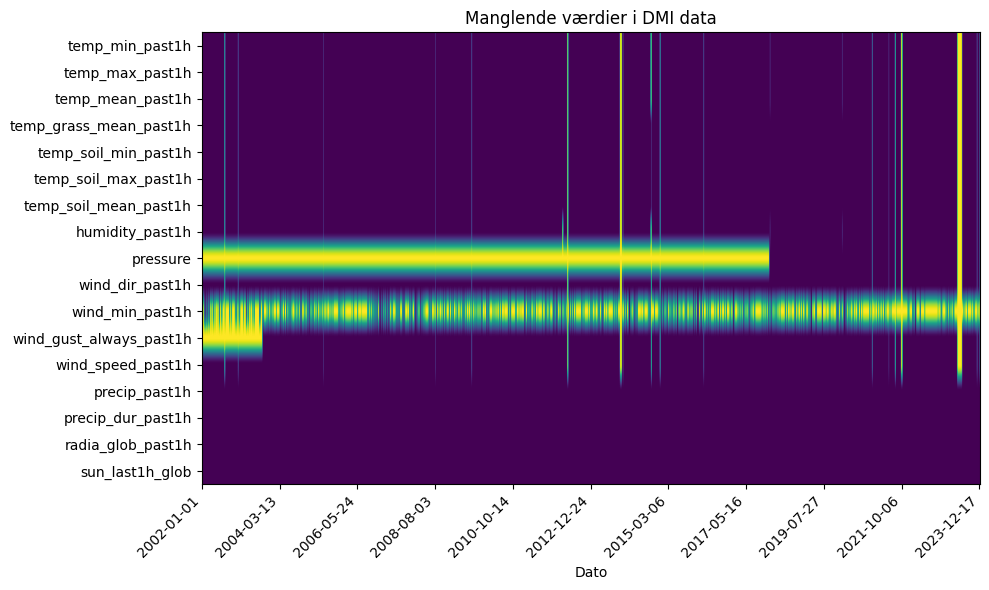

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1) Missing‐value summary
# -------------------------------------------------------------------
missing = df.isna().sum().to_frame('missing_count')
missing['missing_pct'] = missing['missing_count'] / len(df) * 100
print("\nMissing‐values per column:\n", missing)

# -------------------------------------------------------------------
# 2) Visualize missing pattern as a heatmap (True=missing)
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.imshow(df.isna().T, aspect='auto')

# Use dates instead of time index
plt.xticks(
    ticks=range(0, len(df.index), max(1, len(df.index)//10)),  # Show ~10 evenly spaced ticks
    labels=df.index.strftime('%Y-%m-%d')[::max(1, len(df.index)//10)],
    rotation=45,
    ha='right'
)

plt.yticks(range(len(df.columns)), df.columns)
plt.xlabel('Dato')
plt.title('Manglende værdier i DMI data')
plt.tight_layout()
plt.show()

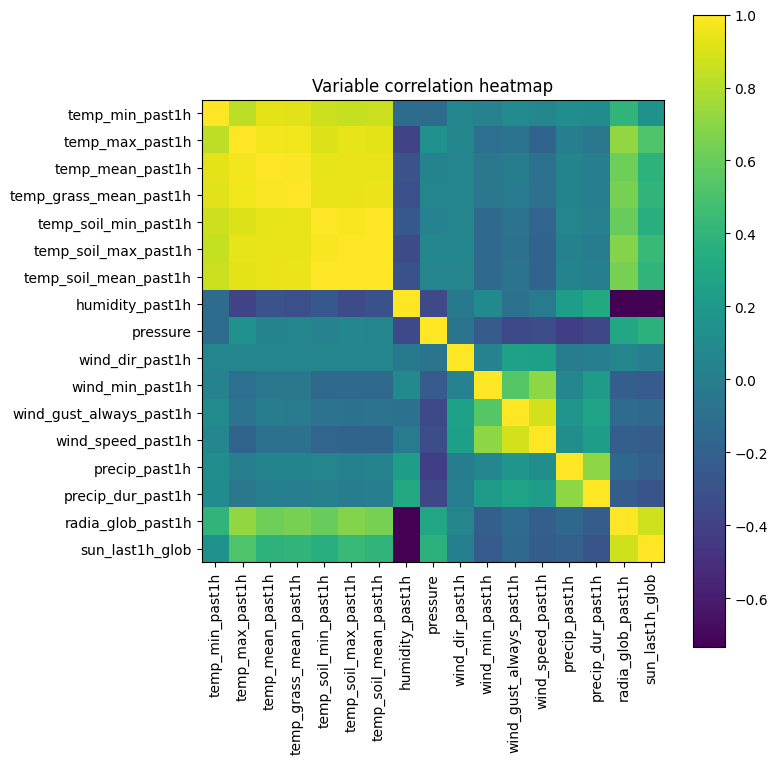

In [10]:
# -------------------------------------------------------------------
# 2) Correlation matrix
# -------------------------------------------------------------------
corr = df.corr()

plt.figure(figsize=(8, 8))
plt.imshow(corr, aspect='equal')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title('Variable correlation heatmap')
plt.tight_layout()
plt.show()


Missing values summary:

                  Missing Count  Missing Percentage (%)
temp_mean_past1h            150                 1.86846
precip_past1h                 0                 0.00000
KarupBro                      0                 0.00000


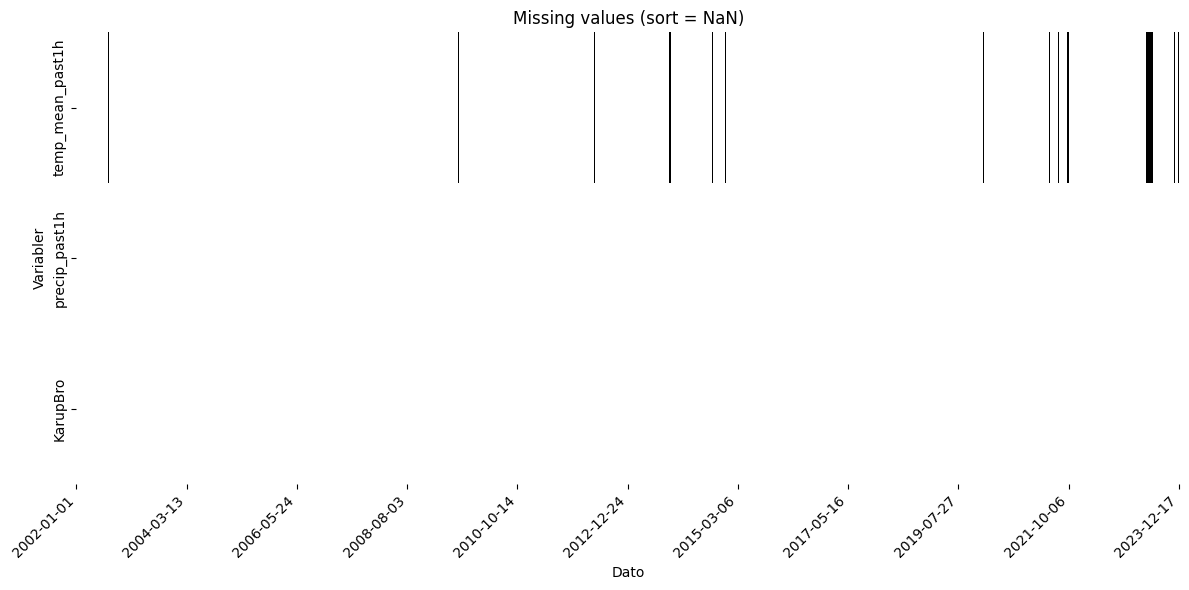

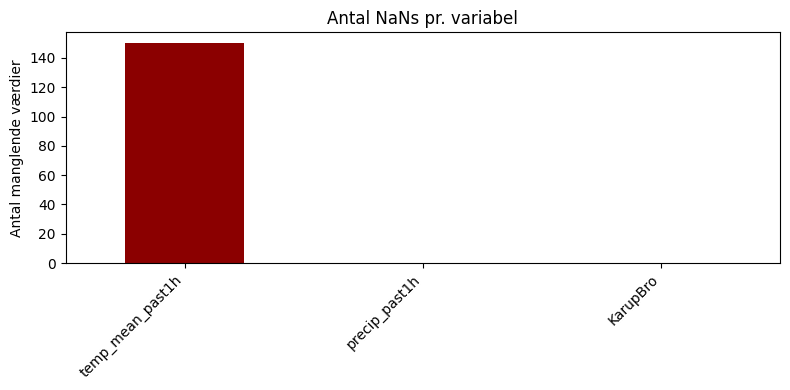

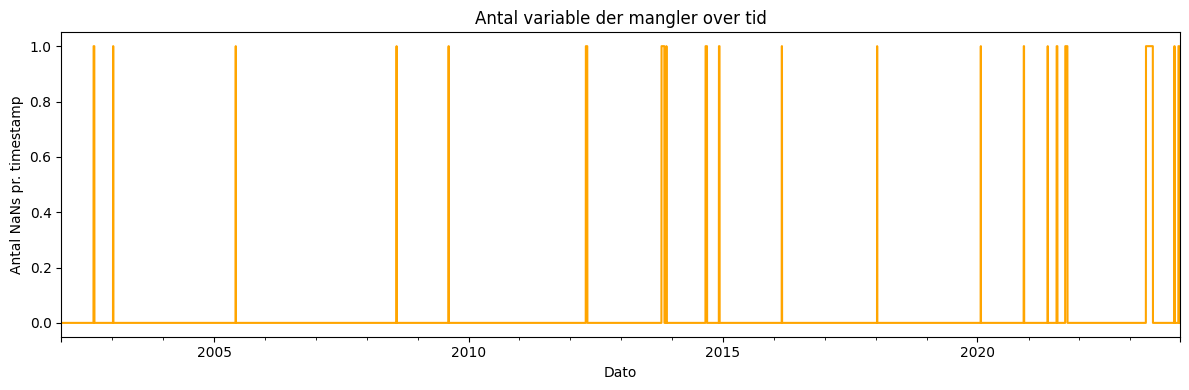

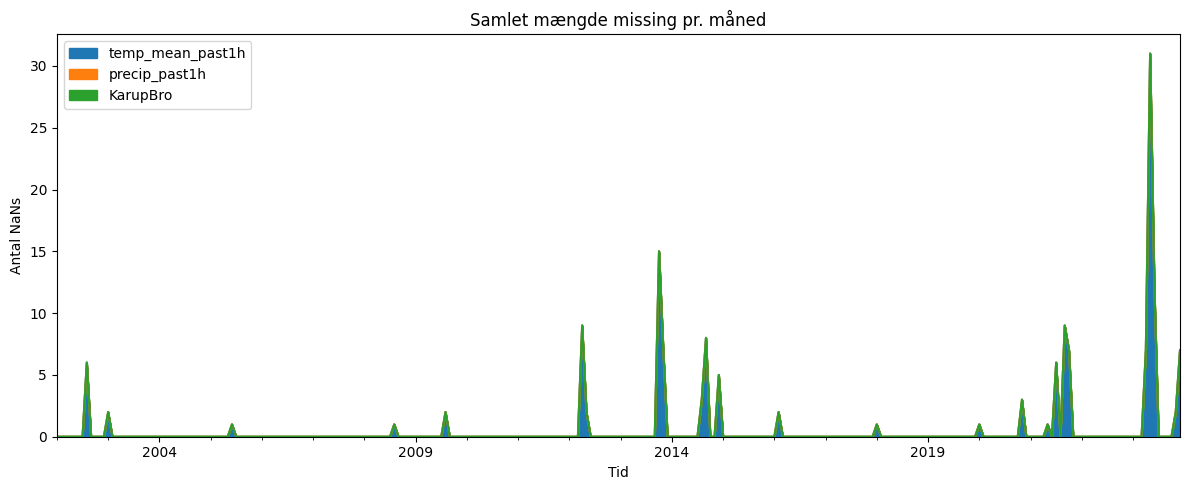

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------
# 1) Load dine to datasæt
# ------------------------------------
df.index = pd.to_datetime(df.index).tz_localize(None)

file_path_korup_parken = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Raw data/Bygholm_Kørup_Parken_VNF_døgn_1975-2023.csv'
korup_parken_df = pd.read_csv(file_path_korup_parken, decimal=",", encoding="ISO-8859-1", delimiter=";")

korup_parken_df.columns = korup_parken_df.columns.str.strip()
korup_parken_df.columns = ["timestamp", "KarupBro", "BygholmPark"]
korup_parken_df["timestamp"] = pd.to_datetime(korup_parken_df["timestamp"], format="%d-%m-%Y")
korup_parken_df.set_index("timestamp", inplace=True)
korup_parken_df.drop(columns=["BygholmPark"], inplace=True)

merged_df = df.join(korup_parken_df, how="left")

# ------------------------------------
# 2) Vælg kun de relevante kolonner
# ------------------------------------
df_subset = merged_df[['temp_mean_past1h', 'precip_past1h', 'KarupBro']].copy()

# ------------------------------------
# 3) Missing-value summary
# ------------------------------------
missing_summary = df_subset.isnull().sum().to_frame(name='Missing Count')
missing_summary['Missing Percentage (%)'] = (missing_summary['Missing Count'] / len(df_subset)) * 100

print("\nMissing values summary:\n")
print(missing_summary)

# ------------------------------------
# 4) Visualisering af missing data
# ------------------------------------

# (1) Heatmap: Missing pr. feature over tid
plt.figure(figsize=(12, 6))
sns.heatmap(df_subset.isna().T, cbar=False, cmap='gray_r', xticklabels=200)
plt.xlabel("Dato")
plt.ylabel("Variabler")
plt.title("Missing values (sort = NaN)")
plt.xticks(
    ticks=range(0, len(df_subset.index), max(1, len(df_subset.index)//10)),
    labels=df_subset.index.strftime('%Y-%m-%d')[::max(1, len(df_subset.index)//10)],
    rotation=45,
    ha='right'
)
plt.tight_layout()
plt.show()

# (2) Barplot: Antal missing pr. kolonne
missing_summary['Missing Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8, 4),
    color='darkred'
)
plt.ylabel("Antal manglende værdier")
plt.title("Antal NaNs pr. variabel")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# (3) Missing over tid: hvor mange NaNs pr. timestamp?
na_over_time = df_subset.isna().sum(axis=1)
plt.figure(figsize=(12, 4))
na_over_time.plot(color='orange')
plt.ylabel("Antal NaNs pr. timestamp")
plt.xlabel("Dato")
plt.title("Antal variable der mangler over tid")
plt.tight_layout()
plt.show()

# (4) Missing pr. måned (stacked)
df_subset.isna().resample('M').sum().plot(kind='area', stacked=True, figsize=(12, 5))
plt.title("Samlet mængde missing pr. måned")
plt.ylabel("Antal NaNs")
plt.xlabel("Tid")
plt.tight_layout()
plt.show()
